# STAT 207 Homework 6 [25 points]

## Hypothesis Testing

Due: Friday, March 1, end of day (11:59 pm CT)

<hr>

## Imports 

Run the following code cell to import the necessary packages into the file.  You may import additional packages, as needed for this assignment.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

## Case Study: Colleges and Universities

We will use a random sample of post-secondary education facilities (colleges & universities) from the United States, including Puerto Rico & other US territories.  The **colleges.csv** file contains a random sample of 135 post-secondary education facilities from the US.  This data originally were obtained from: https://www.kaggle.com/yamqwe/colleges-and-universitiese
although the specific data is no longer available through this link.

We will focus on a few variables in particular:

- the categorization of the school (`NAICS_DESC`)
- the total number of students enrolled (`TOT_ENROLL`)

## 1. Read and prepare the data [1 point] 

**a)** You should read in the data from the **colleges.csv** file.

In [35]:
df = pd.read_csv('colleges.csv')
df

,Unnamed: 0,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,3003,-73.490213,40.759564,5268,189459,Briarcliffe College,1055 Stewart Ave,NOT AVAILABLE,Bethpage,NY,...,NOT AVAILABLE,9,2,440,1226,1666,2,0,356,NOT AVAILABLE
1,2832,-78.332293,35.501418,5097,198774,Johnston Community College,245 College Road,NOT AVAILABLE,Smithfield,NC,...,NOT AVAILABLE,3,2,2141,2075,4216,2,0,697,NOT AVAILABLE
2,3811,-101.891915,33.589284,1076,229337,Texas Tech University Health Sciences Center,3601 4th Street,NOT AVAILABLE,Lubbock,TX,...,NOT AVAILABLE,-2,2,916,3475,4391,2,0,5574,NOT AVAILABLE
3,5143,-85.196213,34.258192,4408,140988,Shorter University,315 Shorter Ave,NOT AVAILABLE,Rome,GA,...,Shorter,11,2,130,1378,1508,1,668,319,NOT AVAILABLE
4,7008,-83.892154,39.798614,2273,440138,Antioch University-System Administration,900 Dayton Street,NOT AVAILABLE,Yellow Springs,OH,...,NOT AVAILABLE,-3,-2,0,0,0,-2,0,89,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1783,-119.732643,36.726017,6048,114813,Fresno Pacific University,1717 S Chestnut Ave,NOT AVAILABLE,Fresno,CA,...,NOT AVAILABLE,10,2,820,2512,3332,1,518,675,NOT AVAILABLE
131,5713,-96.165425,43.083651,4978,153250,Dordt College,498 4th Ave NE,NOT AVAILABLE,Sioux Center,IA,...,NOT AVAILABLE,11,2,56,1344,1400,1,1258,227,NOT AVAILABLE
132,1751,-110.996994,32.296733,6016,105163,ITT Technical Institute-Tucson,1455 W. River Rd,NOT AVAILABLE,Tucson,AZ,...,NOT AVAILABLE,-2,1,188,341,529,2,0,61,NOT AVAILABLE
133,3956,-84.192006,39.695052,1221,203544,Kettering College,3737 Southern Blvd,NOT AVAILABLE,Kettering,OH,...,NOT AVAILABLE,-2,1,417,564,981,1,120,103,NOT AVAILABLE


**b)** Perform any data cleaning that needs to take place.

**Hint:** For the data cleaning, we only care about the 2 variables defined above.  Consider possible values for the `TOT_ENROLL` variable in particular, and remove any colleges or universities that do not have possible, logical values recorded.

In [36]:
df['TOT_ENROLL']

0       1666
1       4216
2       4391
3       1508
4          0
       ...  
130     3332
131     1400
132      529
133      981
134    10073
Name: TOT_ENROLL, Length: 135, dtype: int64

In [37]:
df = df[['TOT_ENROLL','NAICS_DESC']]
df

,TOT_ENROLL,NAICS_DESC
0,1666,"Colleges, Universities, and Professional Schools"
1,4216,Junior Colleges
2,4391,"Colleges, Universities, and Professional Schools"
3,1508,"Colleges, Universities, and Professional Schools"
4,0,Educational Support Services/Closed
...,...,...
130,3332,"Colleges, Universities, and Professional Schools"
131,1400,"Colleges, Universities, and Professional Schools"
132,529,"Colleges, Universities, and Professional Schools"
133,981,"Colleges, Universities, and Professional Schools"


In [38]:
df = df[df['TOT_ENROLL'] > 0]
df

,TOT_ENROLL,NAICS_DESC
0,1666,"Colleges, Universities, and Professional Schools"
1,4216,Junior Colleges
2,4391,"Colleges, Universities, and Professional Schools"
3,1508,"Colleges, Universities, and Professional Schools"
5,3407,"Colleges, Universities, and Professional Schools"
...,...,...
130,3332,"Colleges, Universities, and Professional Schools"
131,1400,"Colleges, Universities, and Professional Schools"
132,529,"Colleges, Universities, and Professional Schools"
133,981,"Colleges, Universities, and Professional Schools"


**c)** We are interested in making statements about junior colleges, colleges, universities, and professional schools.  Update our data so that this can be accomplished.

In [39]:
df = df[(df['NAICS_DESC'] == 'Junior Colleges') | (df['NAICS_DESC'] == 'Colleges, Universities, and Professional Schools')]
df

,TOT_ENROLL,NAICS_DESC
0,1666,"Colleges, Universities, and Professional Schools"
1,4216,Junior Colleges
2,4391,"Colleges, Universities, and Professional Schools"
3,1508,"Colleges, Universities, and Professional Schools"
5,3407,"Colleges, Universities, and Professional Schools"
...,...,...
130,3332,"Colleges, Universities, and Professional Schools"
131,1400,"Colleges, Universities, and Professional Schools"
132,529,"Colleges, Universities, and Professional Schools"
133,981,"Colleges, Universities, and Professional Schools"


## 2. Typical enrollment? [1.5 points]

Although the University of Illinois is a large university with a large enrollment, there are also many smaller colleges in the state, including Parkland College with a total enrollment of 9,715.  

Since we know that there are many more smaller colleges than large universities, we'd like to test if the median college enrollment in the United States is smaller than the enrollment of Parkland College.  

We'd like to perform a hypothesis test using a 10% significance level based on our sample of colleges and universities.

**a)** Update our data to reflect the null hypothesis.

In [40]:
df_copy = df.copy()
df_copy['null_enroll'] = df_copy['TOT_ENROLL'] - df_copy['TOT_ENROLL'].median() + 9715
df_copy['null_enroll'].median()

9715.0

**b)** We will use our simulation-based procedures that we have developed so far this semester.

While we only have our one sample available, we will use it as a stand in for the population.  From our sample, gather a random sample with replacement of the same size as our original sample data.  We will then repeat this process to generate many random samples.  For each of our random samples, calculate and record our statistic of interest.  We will repeat this process 5000 times, and use the 5000 observations of our statistic of interest as a sampling distribution.

In [41]:
one_sample = df_copy['null_enroll'].sample(86, replace = True)
one_sample.median()

9839.0

In [42]:
samp_dist = []
for i in range (5000):
    samp_dist.append(df_copy['null_enroll'].sample(86, replace = True).median())
samp_dist = pd.DataFrame({'x': samp_dist})

array([[<Axes: title={'center': 'x'}>]], dtype=object)

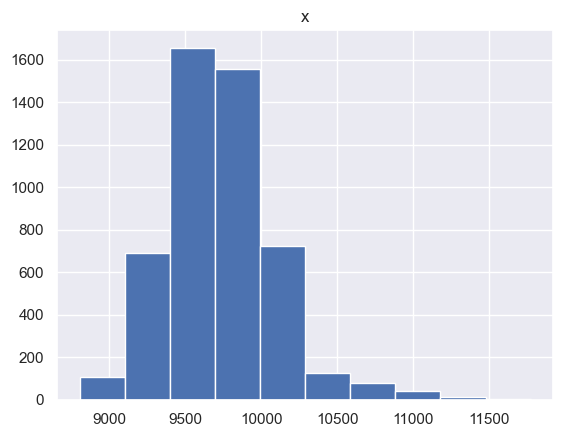

In [43]:
samp_dist.hist()

## 3. Size of Colleges [1 point]

Is the median enrollment for all junior colleges different from the median enrollment for all colleges, universities, and professional schools?  Use a significance level of 1%.

Generate the simulation-based sampling distribution for our statistic of interest.  Be sure to calculate any differences as junior college - colleges, universities, and professional schools.  

In [44]:
samp_dist = []
for i in range (1000):
    new_dist = pd.DataFrame(df['NAICS_DESC'].sample(n=86, replace = False))
    new_dist = new_dist.reset_index()
    new_df = pd.DataFrame({'new_dist': new_dist['NAICS_DESC'], 'enroll': df['TOT_ENROLL']})
    samp_dist.append((new_df.groupby('new_dist').median().iloc[1] - new_df.groupby('new_dist').median().iloc[0])['enroll'])
samp_dist = pd.DataFrame({'x': samp_dist})

In [45]:
samp_dist

,x
0,-1753.5
1,1124.0
2,-334.0
3,-720.5
4,2156.0
...,...
995,199.0
996,-101.0
997,420.0
998,1889.5


Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 6 Canvas Assignment to submit your notebook to GitHub.